In [11]:
import pandas as pd
from eventclass import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [22]:
DIVISION_GUIDE = {'Alabama':'AL',
 'Alaska':'Other',
 'Arizona':'AZ',
 'Ark-La-Miss':'AR',
 'Border Texas':'TX',
 'Capitol':'DC',
 'Central California':'CA',
 'Central Florida':'FL',
 'Central Pennsylvania':'PA',
 'Colorado':'CO',
 'Columbus':'OH',
 'Connecticut':'CT',
 'Gateway Florida':'FL',
 'Georgia':'GA',
 'Gold Coast Florida':'FL',
 'Green Mountain':'VT',
 'Gulf Coast':'TX',
 'Harrisburg':'PA',
 'Hawaii':'Other',
 'Hudson-Berkshire':'NY',
 'Illinois':'IL',
 'Indiana':'IN',
 'Inland Empire':'MT',
 'Iowa':'IA',
 'Kansas':'KS',
 'Kentucky':'KY',
 'Long Island':'NY',
 'Louisiana':'LA',
 'Maryland':'MD',
 'Metropolitan NYC':'NY',
 'Michigan':'MI',
 'Minnesota':'MN',
 'Mountain Valley':'CA',
 'National':'Other',
 'Nebraska-South Dakota':'NE',
 'Nevada':'NV',
 'New England':'MA',
 'New Jersey':'NJ',
 'New Mexico':'NM',
 'North Carolina':'NC',
 'North Coast':'CA',
 'North Texas':'TX',
 'Northeast':'ME',
 'Northeast Pennsylvania':'PA',
 'Northern California':'CA',
 'Northern Ohio':'OH',
 'Oklahoma':'OK',
 'Orange Coast':'CA',
 'Oregon':'OR',
 'Philadelphia':'PA',
 'Plains Texas':'TX',
 'San Bernardino':'CA',
 'San Diego':'CA',
 'South Carolina':'SC',
 'South Jersey':'NJ',
 'South Texas':'TX',
 'Southern California':'CA',
 'Southwest Ohio':'OH',
 'St. Louis':'MO',
 'Tennessee':'TN',
 'Utah-Southern Idaho':'UT',
 'Virginia':'VA',
 'Westchester-Rockland':'NY',
 'Western New York':'NY',
 'Western Pennsylvania':'PA',
 'Western Washington':'WA',
 'Wisconsin':'WI',
 'Wyoming':'WY'}

In [23]:
rocs_raw = pd.read_csv('ROCResults.csv')
region_1_states = ['WA','OR','ID','MT','WY']
region_2_states = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH','KY']
region_3_states = ['ME','NH','VT','MA','NY','RI','CT','NJ','PA']
region_4_states = ['CA','NV','AZ','NM','UT','CO']
region_5_states = ['TX','LA','OK','AR']
region_6_states = ['WV','DE','MD','VA','DC','TN','NC','SC','GA','AL','MS','FL']
region2state = {0:['Other'],1:region_1_states,2:region_2_states,3:region_3_states,4:region_4_states,5:region_5_states,6:region_6_states}
state2region = {}
for region,region_states in region2state.items():
    for state in region_states:
        state2region[state] = region
print(f'We have accounted for {len(state2region.keys())} states')
rocs_raw['event_region'] = rocs_raw['state'].map(state2region)
season_ratings = {x:x[0] for x in rocs_raw.classification.unique()}
rocs_raw['classification_season'] = rocs_raw['classification'].map(season_ratings)
season_earned_ratings = {x:x[0] for x in rocs_raw.earned.dropna().unique()}
rocs_raw['earned_season'] = rocs_raw['earned'].map(season_earned_ratings)
rocs_raw['gw_event'] = rocs_raw['gender']+rocs_raw['weapon']

We have accounted for 50 states


In [25]:
members = pd.read_csv('members.csv')
rocs_members = pd.merge(rocs_raw,members[['Birthdate','Member #','Division']],left_on='memberNum',right_on='Member #')

### NB we are removing people who have a NaN division

In [29]:
division2region = {d:state2region[DIVISION_GUIDE[d]] for d in DIVISION_GUIDE.keys()}
rocs_members = rocs_members[rocs_members['Division'].notna()]
rocs_members['home_region'] = rocs_members['Division'].map(division2region)

In [47]:
AGE_CRITERIA = rocs_members.Birthdate.between(rocs_members.Birthdate.min(),1982), \
            rocs_members.Birthdate.between(1983,2003), \
                rocs_members.Birthdate.between(2004,rocs_members.Birthdate.max())
AGE_ORDER = ['Jr. and younger','Non-Vet Adult','Vet']
LEVEL_ORDER = ['DivIA','DivII']
rocs_members['age_category'] = np.select(AGE_CRITERIA,AGE_ORDER,0)

In [48]:
rocs_members.head()

,tournament,eventStartTime,city,state,level,gender,weapon,eventClass,place,name,...,qualifiedFor,event_region,classification_season,earned_season,gw_event,Birthdate,Member #,Division,home_region,age_category
0,TFC FallFest DIV2/VET ROC,2021-08-21T08:30:00,San Jose,CA,DivII,Mens,Foil,C2,1,WENDLER Alexander J.,...,Earns points,4,C,C,MensFoil,1997,100077411,Northern California,4,Non-Vet Adult
1,TFC FallFest DIV2/VET ROC,2021-08-21T08:30:00,San Jose,CA,DivII,Mens,Foil,C2,2,WOO Christian,...,Earns points,4,E,D,MensFoil,2007,100192464,Northern California,4,Vet
2,Fortune Fencing ROC/VET/RJCC,2021-09-04T08:00:00,Ontario,CA,DivIA,Mens,Foil,A4,54,WOO Christian,...,NaN,4,D,NaN,MensFoil,2007,100192464,Northern California,4,Vet
3,BladeRunner ROC+RJC,2021-11-07T08:00:00,La Jolla,CA,DivIA,Mens,Foil,A3,42,WOO Christian,...,NaN,4,C,NaN,MensFoil,2007,100192464,Northern California,4,Vet
4,Battle of the Bay D1A ROC,2022-02-06T09:00:00,San Jose,CA,DivIA,Mens,Foil,A2,5,WOO Christian,...,Earns points,4,B,NaN,MensFoil,2007,100192464,Northern California,4,Vet


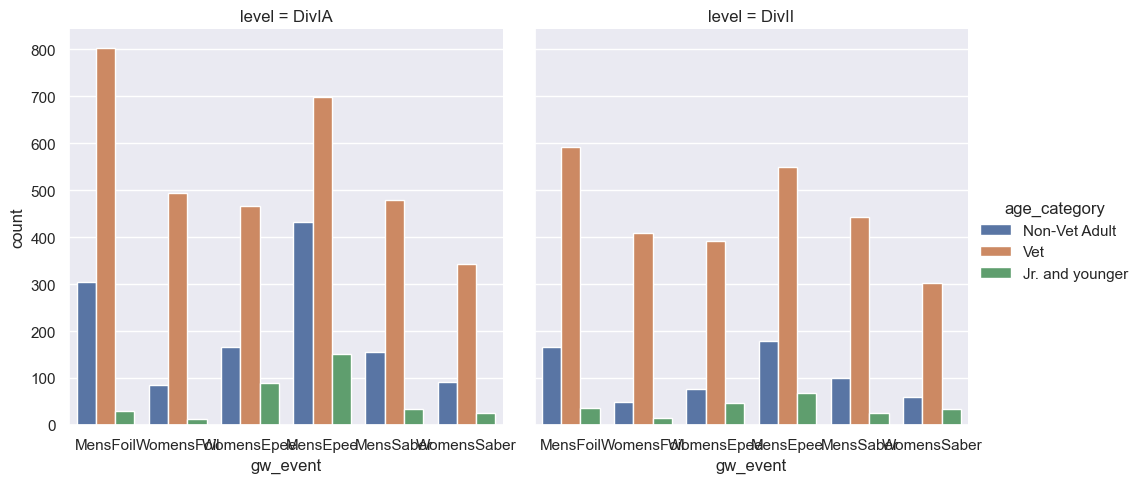

In [50]:
who_goes = sns.catplot(data=rocs_members,x="gw_event",hue="age_category",col='level',col_order=LEVEL_ORDER,kind='count')